### `---------------Mandatory Information to fill------------`

### Group ID: 
DRL Group 89
### Group Members Name with Student ID:
1. Pooja Patila (2023aa05194)
2. Kashyap Rajpurohit (2023ab05027)
3. Ramakrishna C (2023ab05177)
4. Manoj Kumar Pradhan (2023aa05073)


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Problem Statement

Develop a reinforcement learning agent using dynamic programming methods to solve the Dice game optimally. The agent will learn the optimal policy by iteratively evaluating and improving its strategy based on the state-value function and the Bellman equations.

# Scenario:
A player rolls a 6-sided die with the objective of reaching a score of **exactly** 100. On each turn, the player can choose to stop and keep their current score or continue rolling the die. If the player rolls a 1, they lose all points accumulated in that turn and the turn ends. If the player rolls any other number (2-6), that number is added to their score for that turn. The game ends when the player decides to stop and keep their score OR when the player's score reaches 100. The player wins if they reach a score of exactly 100, and loses if they roll a 1 when their score is below 100.



#Environment Details

* The environment consists of a player who can choose to either roll a 6-sided die or stop at any point.
* The player starts with an initial score (e.g., 0) and aims to reach a score of exactly 100.
* If the player rolls a 1, they lose all points accumulated in that turn and the turn ends. If they roll any other number (2-6), that number is added to their score for that turn.
* The goal is to accumulate a total of exactly 100 points to win, or to stop the game before reaching 100 points.

#### States
* State s: Represents the current score of the player, ranging from 0 to 100.
* Terminal States:
    * State s = 100: Represents the player winning the game by reaching the goal of 100 points.
    * State s = 0: Represents the player losing all points accumulated in the turn due to rolling a 1.


#### Actions
* Action a: Represents the decision to either "roll" the die or "stop" the game at the current score.
* The possible actions in any state s are either "roll" or "stop".


# Expected Outcomes:
1.	Use dynamic programming methods value iteration, policy improvement and policy evaluation to find the optimal policy for the Dice Game.
2.	Implement an epsilon-greedy policy for action selection during training to balance exploration and exploitation.
3.	Evaluate the agent's performance in terms of the probability of reaching exactly 100 points after learning the optimal policy.
4.	Use the agent's policy as the best strategy for different betting scenarios within the problem.


# Code Execution

### Initialize constants

In [1]:
import numpy as np
# Constants
goal = 100
gamma = 1.0
faces = 6
prob_roll = (faces-1)/faces

# Design a DiceGame Environment (1M)

In [2]:
# Code for Dataset loading and print dataset statistics along with reward function
#-----write your code below this line---------

class DiceGameEnvironment:
    def __init__(self, target_score):
        self.target_score = target_score
        self.states = range(target_score + 1)
        self.actions = ["roll", "stop"]
        self.rewards = np.zeros(len(self.states))
        self.rewards[target_score] = 1  # Reward for winning
        self.policy = np.random.choice(self.actions, size=len(self.states), p=[prob_roll , 1-prob_roll])
        self.value = np.zeros(len(self.states))
        self.discount_factor = 1.0 
        self.theta = 1e-4  # Convergence threshold

### Define reward funtion

In [47]:
#Calculate reward function for 'stop' and 'roll' actions
#-----write your code below this line---------

def get_transition_probabilities_and_rewards(self, state, action):
    if state == self.target_score:
        return [(state, 1.0, self.rewards[state])]
    
    if action == "stop":
        return [(state, 1.0, self.rewards[state])]
    
    if action == "roll":
        transitions = []
        for roll in range(1, faces + 1):
            if roll == 1:
                next_state = 0  # Reset to initial state as player looses all points
                reward = 0  # Penalty for rolling a 1
            else:
                next_state = min(state + roll, self.target_score)
                reward = 1
            
            transitions.append((next_state, 1/faces, reward))
        return transitions
    
DiceGameEnvironment.get_transition_probabilities_and_rewards = get_transition_probabilities_and_rewards

# Policy Iteration Function Definition (0.5M)

In [48]:
#For each state, Store old_policy of state s.
#Determine best_action based on maximum reward. Update policy[s] to best_action.
#Return stable when old policy = policy[s]

#-----write your code below this line---------
def policy_update(self, state):
    for state in self.states:
        if state == self.target_score:
            continue
        action_values = []
        for action in self.actions:
            transitions = self.get_transition_probabilities_and_rewards(state, action)
            action_value = sum(prob * (reward + self.discount_factor * self.value[next_state]) for next_state, prob, reward in transitions)
            action_values.append(action_value)
        self.policy[state] = self.actions[np.argmax(action_values)]
        
DiceGameEnvironment.policy_update = policy_update

# Value Iteration Function Definition (0.5M)

In [49]:
# Iterate over all states except terminal state untill convergence

# Calculate expected returns V(s) for current policy by considering all possible actions.

#If action is stop:
        #Calculate reward for stopping and append to rewards.
#If action is roll:
        #For each possible roll outcome (1 to 6), Determine next_s based on roll.

# Update V(s) using the Bellman equation.
# V(s)= 1/6[R(s,1)+∑(i=2to6) (R(s,i)+V(s+i))]

#Determine max_reward from rewards
#With probability epsilon, randomly choose a reward from rewards.

#Check convergence if delta is less than a small threshold.

#-----write your code below this line---------
# Iterate until value function converges
def bellman_update(self, state):
    action = self.policy[state]
    transitions = self.get_transition_probabilities_and_rewards(state, action)
    new_value = sum(prob * (reward + self.discount_factor * self.value[next_state]) for next_state, prob, reward in transitions)
    return new_value

def value_iteration(self):
    while True:
        delta = 0
        for state in self.states:
            if state == self.target_score:
                continue
            old_value = self.value[state]
            new_value = self.bellman_update(state)
            self.value[state] = new_value
            delta = max(delta, abs(old_value - new_value))
        if delta < self.theta:
            break

    # Derive policy from the value function
    self.policy_update(state)

def print_policy(self):
    print(self.policy)
    
DiceGameEnvironment.value_iteration = value_iteration
DiceGameEnvironment.bellman_update = bellman_update
DiceGameEnvironment.print_policy = print_policy

# Executing Policy Iteration and Value Iteration Functions (1M)

Print all the iterations for both Policy and Value Iteration approaches separately. (Mandatory)

In [53]:
#Simulate the game for 100 states. Use the learned policy to get the actions.
#when its roll, randomly generate a number to find the reward.
#when its stop, get the respective reward
#determine the total cumulative reward

#-----write your code below this line---------

def play(self):
    state = 0
    while state != self.target_score:
        action = self.policy[state]
        print(f"State: {state}, Action: {action}")
        if action == "roll":
            roll = np.random.randint(1, 7)
            print(f"Rolled: {roll}")
            if roll == 1:
                print("Rolled a 1, you lose!")
                return
            state += roll
        elif action == "stop":
            print(f"Final score: {state}")
            return
    print("Congratulations, you reached 100!")

DiceGameEnvironment.play = play


game = DiceGameEnvironment(goal)
game.value_iteration()
game.play()

State: 0, Action: roll
Rolled: 4
State: 4, Action: roll
Rolled: 4
State: 8, Action: roll
Rolled: 4
State: 12, Action: roll
Rolled: 4
State: 16, Action: roll
Rolled: 6
State: 22, Action: roll
Rolled: 2
State: 24, Action: roll
Rolled: 1
Rolled a 1, you lose!


### Print the Learned Optimal Policy, Optimal Value Function (0.5M)

In [51]:
#-----write your code below this line---------
game.print_policy()


['roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll']


# Change in environment details (1M)

Consider the following scenario:
1. What happens if we change the goal score to 50 instead of 100? How does it affect the optimal policy and value function?
2. How would the optimal policy and value function change if the die had 8 sides instead of 6? Assume the outcomes range from 0 to 7, with each outcome having a probability of 1/8.
3. Experiment with different discount factors (e.g., 0.9, 0.95). How does discounting future rewards impact the optimal policy and value function?
4. Create a heatmap or line plot to visualize the value function over different states. How does the value function change as the state approaches the goal?


State: 0, Action: roll
Rolled: 3
State: 3, Action: roll
Rolled: 4
State: 7, Action: roll
Rolled: 3
State: 10, Action: roll
Rolled: 6
State: 16, Action: roll
Rolled: 2
State: 18, Action: roll
Rolled: 4
State: 22, Action: roll
Rolled: 6
State: 28, Action: roll
Rolled: 3
State: 31, Action: roll
Rolled: 6
State: 37, Action: roll
Rolled: 1
Rolled a 1, you lose!


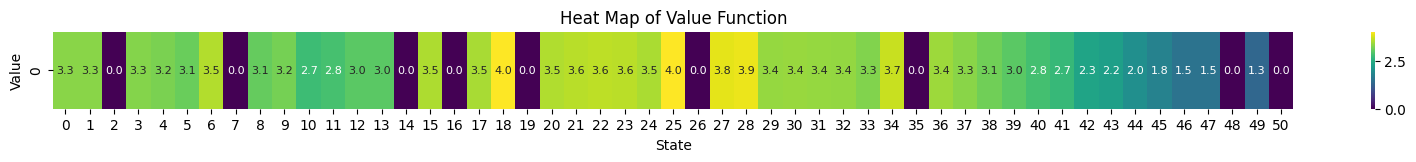

In [60]:
#-----write your code below this line---------

import matplotlib.pyplot as plt
import seaborn as sns

goal = 50
game = DiceGameEnvironment(goal)
game.discount_factor = 0.9
game.value_iteration()
game.play()


# Create the heat map
plt.figure(figsize=(20, 1))
value_function_2d = game.value.reshape((1, -1))
sns.heatmap(value_function_2d, cmap="viridis", cbar=True, annot=True, fmt=".1f", annot_kws={"size": 8})
plt.xlabel("State")
plt.ylabel("Value")
plt.title("Heat Map of Value Function")
plt.show()


# Conclusion (0.5M)

Conclude your assignment in 250 wrods by discussing the best approach for dice problem with the initial parameters and after chnaging the parameters.

`----write below this line------`